In [2]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2, TStyle
import ROOT
import numpy as np
import awkward as awk
import uproot
import pandas as pd


Welcome to JupyROOT 6.22/06


In [3]:
!pwd

/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis


In [4]:
gStyle.SetOptStat(0)
gStyle.SetHistLineWidth(2)
gStyle.SetTitleXSize(0.045)
gStyle.SetTitleYSize(0.035)
gStyle.SetTitleYOffset(1.55)
gStyle.SetPalette(55)
gStyle.SetNumberContours(50)

latex=TLatex()
latex.SetTextSize(0.03)

biglatex=TLatex()
biglatex.SetTextSize(0.045)

smalllatex=TLatex()
smalllatex.SetTextSize(0.022)

In [5]:
d = RDataFrame("tree_MC","~/workdir/MCLundAnalysis/OutputFiles/Lund_8_3/Aug_3_file3.root")

In [10]:
h = d.Histo1D(("h",";kix ;Counts",1000,-2,2),"PFkix")

 FCN=15507 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=4.28068e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.41344e+03   6.17122e+00   3.20832e-01   3.13551e-06
   2  Mean        -7.54538e-04   3.02444e-04   1.83905e-05  -5.93087e-02
   3  Sigma        3.67621e-01   1.83441e-04   8.56751e-06  -3.70353e-02


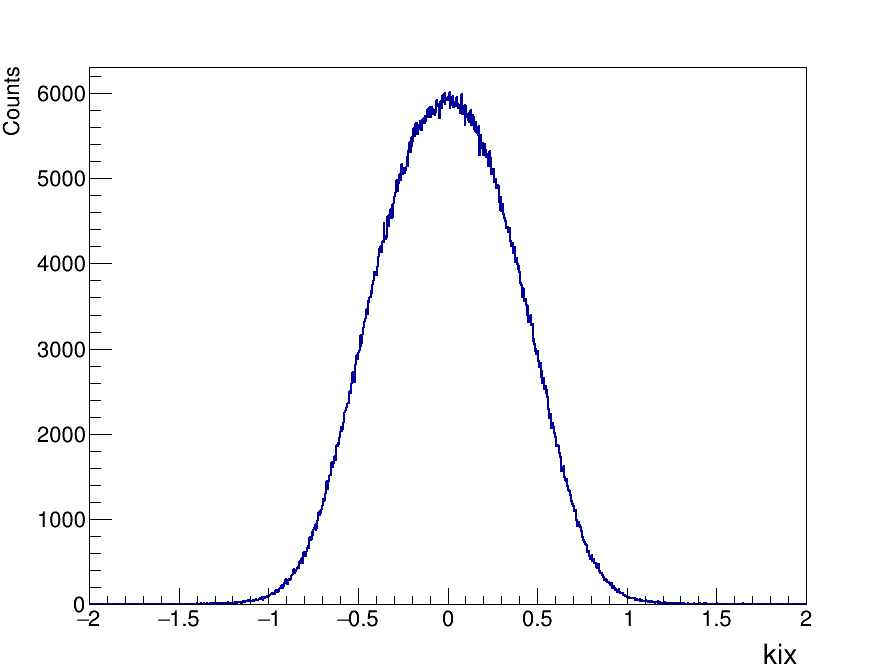

In [11]:
c = TCanvas("c","c",900,700)
h.Fit("gaus")
h.Draw("histo")
c.Draw()

In [7]:
!ls 

'JLab CheatSheet - Copy.md'   OLDLundhistos.ipynb   testfile.root    test.xlsx
 LundAnalysis.C		      random.ipynb	    testfiles
 Lundhistos.ipynb	      README.md		    TestFunction.C


In [8]:
#Converting root to excel
up4_file = uproot.open("testfiles/testfile.root")
up4_MC = up4_file["tree_MC"]
xarray = up4_MC["x"].array(library="np")
zarray = up4_MC["z_h"].array(library="np")
ptarray = up4_MC["pt"].array(library="np")
Q2array = up4_MC["Q2"].array(library="np")
filepath = 'test.xlsx'

array = np.stack((xarray,zarray,ptarray,Q2array),axis = 1)
df = pd.DataFrame (array)

df.to_excel(filepath, index=False)

In [15]:
up4_MC.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
z_h                  | double                   | AsDtype('>f8')
x                    | double                   | AsDtype('>f8')
pt                   | double                   | AsDtype('>f8')
Q2                   | double                   | AsDtype('>f8')
Ph                   | double                   | AsDtype('>f8')
P                    | double                   | AsDtype('>f8')
Mdihadron            | double                   | AsDtype('>f8')
MC92index            | double                   | AsDtype('>f8')
R0                   | double                   | AsDtype('>f8')
R1                   | double                   | AsDtype('>f8')
R2                   | double                   | AsDtype('>f8')
kim                  | double                   | AsDtype('>f8')
kie                  | double                   | AsDtype(

In [28]:
import numpy as np
x = np.array([0,0,1,2,2,3,4,5,5,6,6,6,6,6,6,7,7,7,8,8])

In [ ]:
TH1F *h1 = new TH1F("h1","h1 title", 10,0,10);